## Unsupervised Machine Learning
### Optimum number of clusters



To find the optimum number of clusters we will use elbow method to find number of clusters and then verify it using K-Means clustering.

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data
Labels for the training data (each data point is assigned to a single cluster)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the iris dataset
iris = pd.read_csv('Iris.csv')
iris_df=iris.drop(['Id'],axis=1)
iris_df.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The Iris Dataset contains four features (length and width of sepals and petals) of 150 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

#### Exploratory data analysis

In [2]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# Separate data of each species
setosa=iris_df[iris_df['Species']=='Iris-setosa']
virginica=iris_df[iris_df['Species']=='Iris-virginica']
versicolora=iris_df[iris_df['Species']=='Iris-versicolor']
setosa.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Visualize features of each species

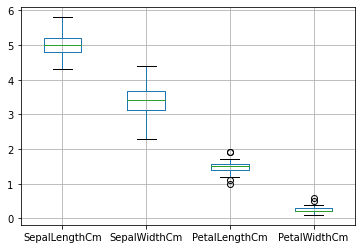

In [4]:
setosa.plot.box(grid='True')

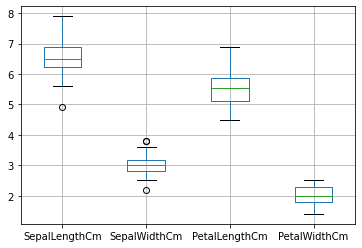

In [5]:
virginica.plot.box(grid='True')

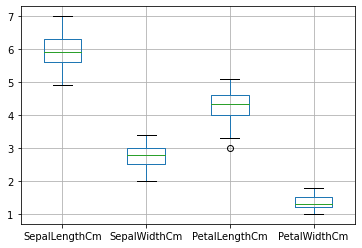

In [6]:
versicolora.plot.box(grid='True')

#### K Means

The K signifies the number of clusters that the algorithm would find in the dataset. Now choosing the right K is very important.

The way to evaluate the choice of K is made using a parameter known as WCSS. WCSS stands for Within Cluster Sum of Squares. It should be low. 


The Elbow Method is used to choose the best K value. Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed. There would be many times when the graph wouldn't be this intuitive but with practice it becomes easier.

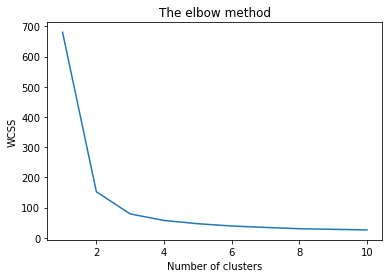

In [7]:
# Finding the optimum number of clusters for k-means classification
data=iris_df.drop(['Species'],axis=1)

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 2.
And we can also check for 3 clusters

In [16]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
data=iris_df.drop(['Species'],axis=1)
#data = iris_df.iloc[:, [0, 1, 2, 3]].values

X, _ = make_blobs(n_samples=150, centers=3, n_features=4)

df = pd.DataFrame(X, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

kmeans = KMeans(n_clusters=2)

y = kmeans.fit_predict(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

df['Cluster'] = y
df['id']=iris_df['Species']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster,id
145,1.585273,0.249420,-6.913813,4.352038,0,Iris-virginica
146,8.477144,-8.637817,-7.981474,-5.073762,1,Iris-virginica
147,8.882911,-8.548438,-7.267888,-5.913344,1,Iris-virginica
148,3.376035,0.677209,-6.366463,5.401159,0,Iris-virginica
149,4.463521,-6.048749,-2.415446,1.287612,1,Iris-virginica


In [17]:
d=df.groupby(['id','Cluster']).count()
d

SepalLengthCm  SepalWidthCm  PetalLengthCm  \
id              Cluster                                               
Iris-setosa     0                   18            18             18   
                1                   32            32             32   
Iris-versicolor 0                   19            19             19   
                1                   31            31             31   
Iris-virginica  0                   14            14             14   
                1                   36            36             36   

                         PetalWidthCm  
id              Cluster                
Iris-setosa     0                  18  
                1                  32  
Iris-versicolor 0                  19  
                1                  31  
Iris-virginica  0                  14  
                1                  36

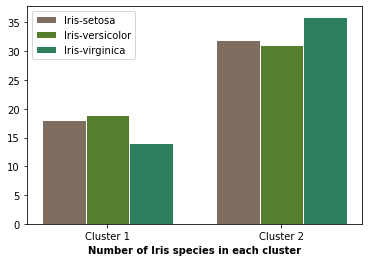

In [21]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1=d.iloc[0:2, 1].values
bars2=d.iloc[2:4, 1].values
bars3=d.iloc[4:6, 1].values

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Iris-setosa')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Iris-versicolor')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Iris-virginica')
 
# Add xticks on the middle of the group bars
plt.xlabel('Number of Iris species in each cluster', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Cluster 1', 'Cluster 2'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [22]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
data=iris_df.drop(['Species'],axis=1)
#x = iris_df.iloc[:, [0, 1, 2, 3]].values

X, _ = make_blobs(n_samples=150, centers=3, n_features=4)

df = pd.DataFrame(X, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

df['Cluster'] = y
df['id']=iris_df['Species']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster,id
145,-5.590654,0.929328,-6.458539,9.326239,1,Iris-virginica
146,-6.309959,0.073550,-6.055303,9.722788,1,Iris-virginica
147,10.574507,-7.539181,3.498587,-5.202210,2,Iris-virginica
148,-1.892634,5.694091,-2.129702,-9.472112,0,Iris-virginica
149,9.407701,-5.620351,4.464821,-6.598805,2,Iris-virginica


In [23]:
d=df.groupby(['id','Cluster']).count()
d

SepalLengthCm  SepalWidthCm  PetalLengthCm  \
id              Cluster                                               
Iris-setosa     0                   19            19             19   
                1                   19            19             19   
                2                   12            12             12   
Iris-versicolor 0                   13            13             13   
                1                   15            15             15   
                2                   22            22             22   
Iris-virginica  0                   18            18             18   
                1                   16            16             16   
                2                   16            16             16   

                         PetalWidthCm  
id              Cluster                
Iris-setosa     0                  19  
                1                  19  
                2                  12  
Iris-versicolor 0                  13  
                1                  15  
                2                  22  
Iris-virginica  0                  18  
                1                  16  
                2                  16

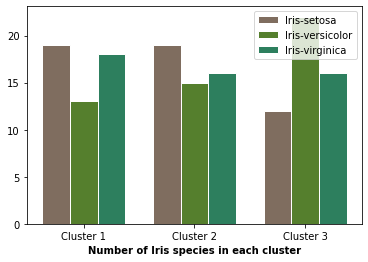

In [24]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1=d.iloc[0:3, 1].values
bars2=d.iloc[3:6, 1].values
bars3=d.iloc[6:9, 1].values

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Iris-setosa')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Iris-versicolor')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Iris-virginica')
 
# Add xticks on the middle of the group bars
plt.xlabel('Number of Iris species in each cluster', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Cluster 1', 'Cluster 2','Cluster 3'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


From the above results, we can clearly see that in 1st results there is uneven distribution of samples among the two clusters. However in the second result, depending on the features the species differentiate itself.